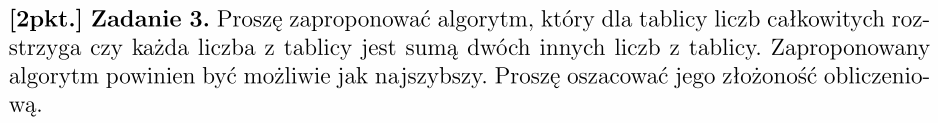

### Omówienie algorytmu

Najpierw sortujemy tablicę liczb algorytmem Quick Sort w czasie $ O(n \cdot log(n)) $. Wybrałem ten algorytm sortowania, ponieważ jest relatywnie szybki, a nie wiemy nic na temat rozkładu, czy ograniczenia zbioru liczb, z którego pochodzą sortowane wartości. Kolejnym krokiem jest przejście liniowe po posortowanej tablicy i sprawdzanie również w sposób liniowy, czy dana liczba jest sumą dwóch innych wartości z tablicy. Oczywiście możemy pomijać już liczby, dla których wcześniej to sprawdziliśmy, ponieważ wiemy, że istnieje dla nich już suma. Ponieważ poszukiwanie sumy robimy dla $ n $ liczb w czasie $ O(n) $ dla każdej, sumaryczna złożoność czasowa algorytmu wyniesie $ O(n^2 + n \cdot log(n)) = O(n^2) $.

##### Doprecyzowanie

Takie same liczby traktuję jako liczby rozróżnialne, więc przez sumę <b><u>dwóch innych liczb z tablicy</u></b> rozumiem możliwość sumowania liczby, która nie jest liczbą, znajdującą się pod obecnie sprawdzany, indeksem $ i $, ale ma tę samą wartość, co ta liczba. Z tego powodu uznaję np. poniższą tablicę za taką, która spełnia warunki zadania:

    [0, 0, 0]  # Mimo, że mamy 3 takie same liczby, traktuję je jako 3 rozróżnialne 
               wartości, więc każda liczba jest sumą dwóch innych z tablicy

### Implementacja algorytmu

In [1]:
def check_sums(arr):
    if len(arr) < 3: return False
    # Sort an array of values at first
    quick_sort(arr)
    # Check sums for each value
    # Check sum for the first one separately
    if not is_sum_of_two_different_values(arr, 0):
        return False
    # Check other values in a loop
    for i in range(1, len(arr)):
        # Check a condition only for values which haven't
        # been checked yet
        if arr[i] != arr[i-1]:
            if not is_sum_of_two_different_values(arr, i):
                return False
    # Return True if all values were marked as sums of other values
    # from an array
    return True


def is_sum_of_two_different_values(arr, i):
    l = 0
    r = len(arr) - 1
    
    while l < r:
        # Skip if one of checked values is a current value
        if l == i: l += 1; continue
        if r == i: r -= 1; continue
            
        curr_sum = arr[l] + arr[r]
        # If a sum is too large, make it smaller
        if curr_sum > arr[i]: r -= 1
        # If a sum is too small, make it greater
        elif curr_sum < arr[i]: l += 1
        # Else, return True as we found desired values
        else: return True
    
    # Return False if no sum was found
    return False
        
    
def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position  # I removed a tailing recursion

        
def _partition(arr, left_idx, right_idx):
    pivot = arr[left_idx]
    # Partition an array into 2 subarrays of elements lower than or
    # equal to a pivot and of elements greater or equal to a pivot 
    # (in this partition algorithm pivot isn't placed on a fixed position 
    # but can be also swapped like all the remaining values)
    i = left_idx - 1
    j = right_idx + 1
    while True:
        i += 1
        while arr[i] < pivot: i += 1
            
        j -= 1
        while arr[j] > pivot: j -= 1
        
        if i < j:
            _swap(arr, i, j)
        else:
            return j  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [2]:
a = [0, 0, 0]
print(a, check_sums(a))

[0, 0, 0] True


In [3]:
def find_sum_indices(arr, target_sum):
    i = 0
    j = len(arr) - 1
    
    while i < j:
        # Skip if i or j is an index of the value checked
        if i == k: 
            i += 1
            continue
        if j == k: 
            j -= 1
            continue
        
        curr_sum = arr[i] + arr[j]
        if curr_sum == target_sum: return i, j
        if curr_sum < target_sum: i += 1
        else: j -= 1
            
    return None, None


import random

arr = [random.randint(-15, 15) for _ in range(random.randint(0, 20))]
result = check_sums(arr)

print(sorted(arr))
print(result)


for k in range(len(arr)):
    i, j = find_sum_indices(arr, arr[k])
    print('Value:', arr[k], end='  ->\t')
    print(f'arr[i] = {arr[i]}, arr[j] = {arr[j]}' if i is not None else None)

[-12, -10, -10, -8, -6, -3, -2, -1, 0, 0, 1, 3, 6, 8, 9]
True
Value: -12  ->	arr[i] = -10, arr[j] = -2
Value: -10  ->	arr[i] = -10, arr[j] = 0
Value: -10  ->	arr[i] = -10, arr[j] = 0
Value: -8  ->	arr[i] = -6, arr[j] = -2
Value: -6  ->	arr[i] = -12, arr[j] = 6
Value: -3  ->	arr[i] = -12, arr[j] = 9
Value: -2  ->	arr[i] = -10, arr[j] = 8
Value: -1  ->	arr[i] = -10, arr[j] = 9
Value: 0  ->	arr[i] = -8, arr[j] = 8
Value: 0  ->	arr[i] = -8, arr[j] = 8
Value: 1  ->	arr[i] = -8, arr[j] = 9
Value: 3  ->	arr[i] = -6, arr[j] = 9
Value: 6  ->	arr[i] = -3, arr[j] = 9
Value: 8  ->	arr[i] = -1, arr[j] = 9
Value: 9  ->	arr[i] = 1, arr[j] = 8
